# Class and Region Wise correlations on Test sets

For Hydrop - all cells all reads 10 fold models

In [41]:
import os
import anndata
import crested
import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
print(crested.__version__)

1.5.0


In [4]:
genome_path = "../../../../../../../../../../res_00001/genomes/10xgenomics/CellRangerARC/refdata-cellranger-arc-mm10-2020-A-2.0.0/fasta/genome.fa"
model_hydrop_folders_path = "../../../../../../../data/hydrop/mcortex/paper_zips/10x_hydropv2_comparisons_models/finetuned/hydrop_allcells_allreads/"
model_10x_folders_path = "../../../../../../../data/hydrop/mcortex/paper_zips/10x_hydropv2_comparisons_models/finetuned/10x_allcells_allreads/"
anndata_hydrop_full_path = "../../../../../../../data/hydrop/mcortex/paper_zips/10x_hydropv2_comparisons_data/anndatas/hydrop_allcells_allreads/normalized.h5ad"
anndata_hydrop_specific_path = "../../../../../../../data/hydrop/mcortex/paper_zips/10x_hydropv2_comparisons_data/anndatas/hydrop_allcells_allreads/normalized_specific.h5ad"
anndata_10x_full_path = "../../../../../../../data/hydrop/mcortex/paper_zips/10x_hydropv2_comparisons_data/anndatas/10x_allcells_allreads/normalized.h5ad"
anndata_10x_specific_path = "../../../../../../../data/hydrop/mcortex/paper_zips/10x_hydropv2_comparisons_data/anndatas/10x_allcells_allreads/normalized_specific.h5ad"

In [5]:
genome = crested.Genome(genome_path, name="mm10")
crested.register_genome(genome)

2025-08-21T10:24:38.351038+0200 INFO Genome mm10 registered.


In [8]:
anndata_hydrop_full = anndata.read_h5ad(anndata_hydrop_full_path)
anndata_hydrop_specific = anndata.read_h5ad(anndata_hydrop_specific_path)
anndata_10x_full = anndata.read_h5ad(anndata_10x_full_path)
anndata_10x_specific = anndata.read_h5ad(anndata_10x_specific_path)

In [9]:
# all regions
anndata_hydrop_full

AnnData object with n_obs × n_vars = 16 × 808843
    obs: 'file_path'
    var: 'chr', 'start', 'end', 'fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9'
    obsm: 'weights'

In [10]:
# specific regions only
anndata_10x_specific

AnnData object with n_obs × n_vars = 16 × 127944
    obs: 'file_path'
    var: 'chr', 'start', 'end', 'fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9'
    obsm: 'weights'

## Get test predictions per fold

In [11]:
# get test regions predictions per fold

## HyDropv2
fold_preds_hydrop_full = {}
fold_preds_hydrop_specific = {}
for fold_model in sorted(os.listdir(model_hydrop_folders_path)):
    fold_name = fold_model.replace(".keras", "")
    print(fold_name)
    test_regions = anndata_hydrop_full.var.index[anndata_hydrop_full.var[fold_name] == "val"].tolist()
    print(len(test_regions))
    model = keras.models.load_model(
        os.path.join(model_hydrop_folders_path, fold_model),
        compile=False
    )
    # all regions
    fold_preds = crested.tl.predict(
        test_regions,
        model=model
    )
    fold_preds_hydrop_full[fold_name] = fold_preds

    # specific regions
    test_regions = anndata_hydrop_specific.var.index[anndata_hydrop_specific.var[fold_name] == "val"].tolist()
    print(len(test_regions))
    fold_preds = crested.tl.predict(
        test_regions,
        model=model
    )
    fold_preds_hydrop_specific[fold_name] = fold_preds

## 10x
fold_preds_10x_full = {}
fold_preds_10x_specific = {}
for fold_model in sorted(os.listdir(model_10x_folders_path)):
    fold_name = fold_model.replace(".keras", "")
    print(fold_name)
    test_regions = anndata_10x_full.var.index[anndata_10x_full.var[fold_name] == "val"].tolist()
    print(len(test_regions))
    model = keras.models.load_model(
        os.path.join(model_10x_folders_path, fold_model),
        compile=False
    )
    # all regions
    fold_preds = crested.tl.predict(
        test_regions,
        model=model
    )
    fold_preds_10x_full[fold_name] = fold_preds

    # specific regions
    test_regions = anndata_10x_specific.var.index[anndata_10x_specific.var[fold_name] == "val"].tolist()
    print(len(test_regions))
    fold_preds = crested.tl.predict(
        test_regions,
        model=model
    )
    fold_preds_10x_specific[fold_name] = fold_preds

fold_0
80893
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
18564
146/146 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step
fold_1
80890
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
16318
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step
fold_2
80890
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
14925
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step
fold_3
80888
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
17639
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step
fold_4
80886
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
9579
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step
fold_5
80882
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
13413
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step
fold_6
80883
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
17592
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step
fold_7
80879
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
16665
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step
fold_8
80878
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
5796
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
fold_9
80874
632/632 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step
1587
13/13 ━━━

In [16]:
# get ground truths in the same order as predictions

## Hydrop
fold_gt_hydrop_full = {}
fold_gt_hydrop_specific = {}
for fold_name in fold_preds_hydrop_full.keys():
    fold_gt_hydrop_full[fold_name] = anndata_hydrop_full.X[:,anndata_hydrop_full.var[fold_name] == "val"].T
    fold_gt_hydrop_specific[fold_name] = anndata_hydrop_specific.X[:,anndata_hydrop_specific.var[fold_name] == "val"].T

for fold_name in fold_preds_hydrop_full.keys():
    assert len(fold_preds_hydrop_full[fold_name]) == len(fold_gt_hydrop_full[fold_name])
    assert len(fold_preds_hydrop_specific[fold_name]) == len(fold_gt_hydrop_specific[fold_name])

## 10x
fold_gt_10x_full = {}
fold_gt_10x_specific = {}
for fold_name in fold_preds_10x_full.keys():
    fold_gt_10x_full[fold_name] = anndata_10x_full.X[:,anndata_10x_full.var[fold_name] == "val"].T
    fold_gt_10x_specific[fold_name] = anndata_10x_specific.X[:,anndata_10x_specific.var[fold_name] == "val"].T

for fold_name in fold_preds_10x_full.keys():
    assert len(fold_preds_10x_full[fold_name]) == len(fold_gt_10x_full[fold_name])
    assert len(fold_preds_10x_specific[fold_name]) == len(fold_gt_10x_specific[fold_name])

In [17]:
fold_gt_hydrop_full["fold_0"].shape

(80893, 16)

## Calculate region and class-wise correlations

In [20]:
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score

def calculate_region_correlations(fold_preds_dict, fold_gt_dict):
    """
    Calculate Pearson correlations between predictions and ground truth for each region
    across all folds.
    
    Returns a list of correlation coefficients (one per region per fold)
    """
    all_correlations = []
    
    for fold_name in fold_preds_dict.keys():
        preds = fold_preds_dict[fold_name]  
        gt = fold_gt_dict[fold_name]        
        
        # Calculate correlation for each region (across classes)
        for region_idx in range(preds.shape[0]):
            pred_region = np.log1p(preds[region_idx, :])  
            gt_region = np.log1p(gt[region_idx, :])       
            
            corr, p_value = pearsonr(pred_region, gt_region)
            if not np.isnan(corr): 
                all_correlations.append(corr)
    
    return all_correlations

def calculate_class_correlations(fold_preds_dict, fold_gt_dict):
    """
    Calculate Pearson correlations between predictions and ground truth for each class
    across all folds.
    
    Returns a list of correlation coefficients (one per class per fold)
    """
    all_correlations = []
    
    for fold_name in fold_preds_dict.keys():
        preds = fold_preds_dict[fold_name]  
        gt = fold_gt_dict[fold_name]        
        
        # Calculate correlation for each class (across regions)
        for class_idx in range(preds.shape[1]):
            pred_class = np.log1p(preds[:, class_idx])  
            gt_class = np.log1p(gt[:, class_idx])       
            
            corr, p_value = pearsonr(pred_class, gt_class)
            if not np.isnan(corr):  
                all_correlations.append(corr)
    
    return all_correlations

In [21]:
print("Calculating region-wise correlations...")
region_corrs_hydrop_full = calculate_region_correlations(fold_preds_hydrop_full, fold_gt_hydrop_full) # list of corrs per region x n_folds
region_corrs_hydrop_specific = calculate_region_correlations(fold_preds_hydrop_specific, fold_gt_hydrop_specific)
region_corrs_10x_full = calculate_region_correlations(fold_preds_10x_full, fold_gt_10x_full)
region_corrs_10x_specific = calculate_region_correlations(fold_preds_10x_specific, fold_gt_10x_specific)

print(f"HyDropv2 Full - Region correlations: {len(region_corrs_hydrop_full)}")
print(f"HyDropv2 Specific - Region correlations: {len(region_corrs_hydrop_specific)}")
print(f"10x Full - Region correlations: {len(region_corrs_10x_full)}")
print(f"10x Specific - Region correlations: {len(region_corrs_10x_specific)}")

Calculating region-wise correlations...
HyDropv2 Full - Region correlations: 808843
HyDropv2 Specific - Region correlations: 132078
10x Full - Region correlations: 808843
10x Specific - Region correlations: 127944


In [22]:
# Calculate class-wise correlations
print("\nCalculating class-wise correlations...")
class_corrs_hydrop_full = calculate_class_correlations(fold_preds_hydrop_full, fold_gt_hydrop_full) # list of corrs per class x n_folds
class_corrs_hydrop_specific = calculate_class_correlations(fold_preds_hydrop_specific, fold_gt_hydrop_specific)
class_corrs_10x_full = calculate_class_correlations(fold_preds_10x_full, fold_gt_10x_full)
class_corrs_10x_specific = calculate_class_correlations(fold_preds_10x_specific, fold_gt_10x_specific)

print(f"HyDropv2 Full - Class correlations: {len(class_corrs_hydrop_full)}")
print(f"HyDropv2 Specific - Class correlations: {len(class_corrs_hydrop_specific)}")
print(f"10x Full - Class correlations: {len(class_corrs_10x_full)}")
print(f"10x Specific - Class correlations: {len(class_corrs_10x_specific)}")


Calculating class-wise correlations...
HyDropv2 Full - Class correlations: 160
HyDropv2 Specific - Class correlations: 160
10x Full - Class correlations: 160
10x Specific - Class correlations: 160


## Plot Correlations

In [39]:
# Prepare data for plotting - Region-wise correlations
region_data = []
for corr in region_corrs_hydrop_full:
    region_data.append({'Technology': 'HyDropv2', 'Dataset': 'Full', 'Correlation': corr})
for corr in region_corrs_10x_full:
    region_data.append({'Technology': '10x', 'Dataset': 'Full', 'Correlation': corr})

# Cell type-specific regions
for corr in region_corrs_hydrop_specific:
    region_data.append({'Technology': 'HyDropv2', 'Dataset': 'Cell Type-Specific', 'Correlation': corr})
for corr in region_corrs_10x_specific:
    region_data.append({'Technology': '10x', 'Dataset': 'Cell Type-Specific', 'Correlation': corr})

region_df = pd.DataFrame(region_data)

In [35]:
# Prepare data for plotting - Class-wise correlations
class_data = []
# Full test set
for corr in class_corrs_hydrop_full:
    class_data.append({'Technology': 'HyDropv2', 'Dataset': 'Full', 'Correlation': corr})
for corr in class_corrs_10x_full:
    class_data.append({'Technology': '10x', 'Dataset': 'Full', 'Correlation': corr})

# Cell type-specific regions
for corr in class_corrs_hydrop_specific:
    class_data.append({'Technology': 'HyDropv2', 'Dataset': 'Cell Type-Specific', 'Correlation': corr})
for corr in class_corrs_10x_specific:
    class_data.append({'Technology': '10x', 'Dataset': 'Cell Type-Specific', 'Correlation': corr})

class_df = pd.DataFrame(class_data)

In [46]:
palette = {"HyDropv2": "#E69F00", "10x": "#0072B2"}

/tmp/ipykernel_2626856/2434383277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data, x='Technology', y='Correlation', ax=axes[0], palette=palette)
/tmp/ipykernel_2626856/2434383277.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=specific_data, x='Technology', y='Correlation', ax=axes[1], palette=palette)


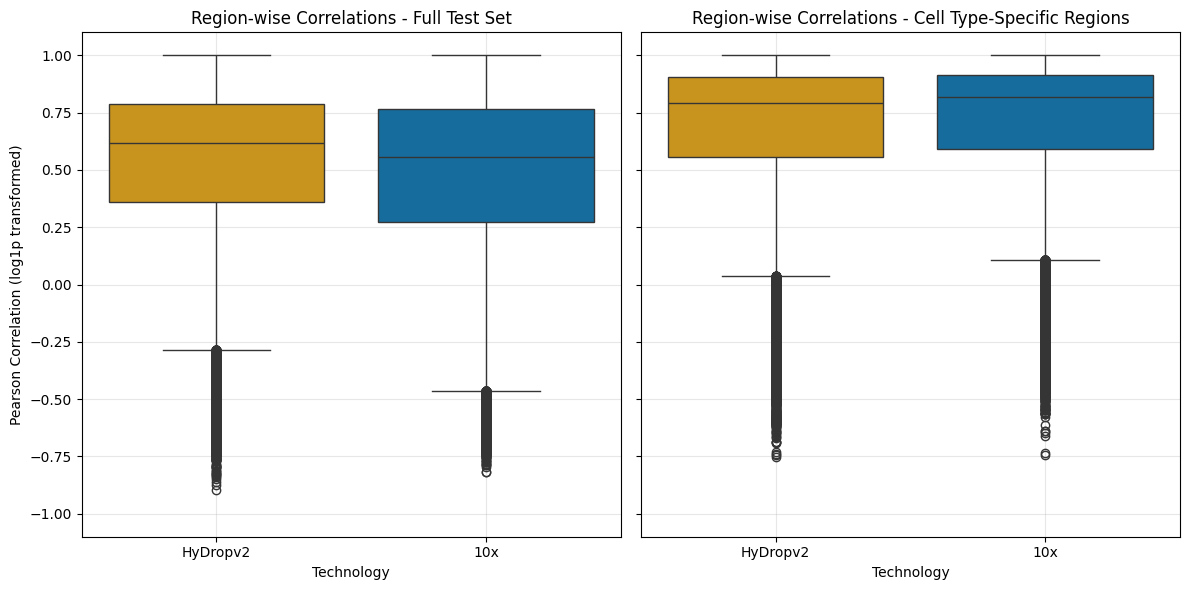

In [57]:
%matplotlib inline
# Create boxplots for region-wise correlations
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Full test set
full_data = region_df[region_df['Dataset'] == 'Full']
sns.boxplot(data=full_data, x='Technology', y='Correlation', ax=axes[0], palette=palette)
axes[0].set_title('Region-wise Correlations - Full Test Set')
axes[0].set_ylabel('Pearson Correlation (log1p transformed)')
axes[0].set_ylim(-1.1, 1.1)
axes[0].grid(True, alpha=0.3)

# Cell type-specific regions
specific_data = region_df[region_df['Dataset'] == 'Cell Type-Specific']
sns.boxplot(data=specific_data, x='Technology', y='Correlation', ax=axes[1], palette=palette)
axes[1].set_title('Region-wise Correlations - Cell Type-Specific Regions')
axes[1].set_ylabel('Pearson Correlation (log1p transformed)')
axes[1].set_ylim(-1.1, 1.1)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
fig.savefig("region_correlations.pdf", bbox_inches='tight', dpi=300, format="pdf")

/tmp/ipykernel_2626856/3975386002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=full_data, x='Technology', y='Correlation', ax=axes[0], palette=palette)
/tmp/ipykernel_2626856/3975386002.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=specific_data, x='Technology', y='Correlation', ax=axes[1], palette=palette)


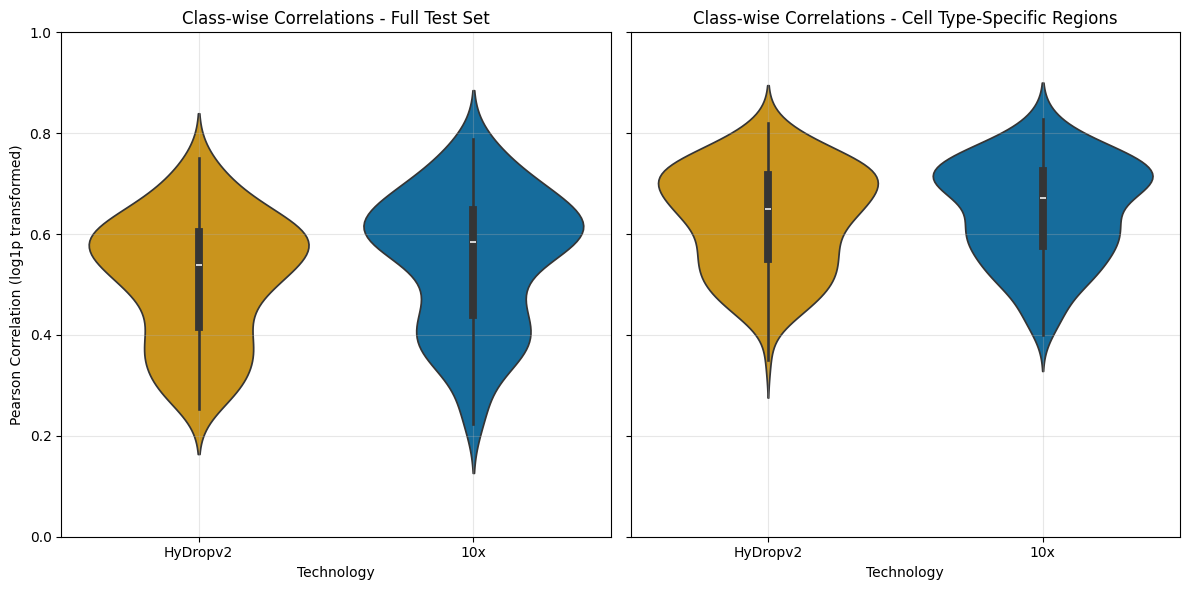

In [58]:
# Create violin plots for class-wise correlations
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Full test set
full_data = class_df[class_df['Dataset'] == 'Full']
sns.violinplot(data=full_data, x='Technology', y='Correlation', ax=axes[0], palette=palette)
axes[0].set_title('Class-wise Correlations - Full Test Set')
axes[0].set_ylabel('Pearson Correlation (log1p transformed)')
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)

# Cell type-specific regions
specific_data = class_df[class_df['Dataset'] == 'Cell Type-Specific']
sns.violinplot(data=specific_data, x='Technology', y='Correlation', ax=axes[1], palette=palette)
axes[1].set_title('Class-wise Correlations - Cell Type-Specific Regions')
axes[1].set_ylabel('Pearson Correlation (log1p transformed)')
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
fig.savefig("class_correlations.pdf", bbox_inches='tight', dpi=300, format='pdf')